In [1]:
import sys
sys.path.append('/Users/sam/All-Program/App/ObjectDetection/')

import logging
logging.basicConfig(level=logging.DEBUG, filename="logfile.log", filemode="w",
                    format="%(asctime)-15s %(levelname)-8s %(message)s")

import numpy as np
from scipy import ndimage
from scipy import misc
from MaskRCNN.visualize import Visualize

from MaskRCNN.main_debug import Inference

%matplotlib inline 

pretrained_weights_path = '/Users/sam/All-Program/App-DataSet/ObjectDetection/MaskRCNN/mask_rcnn_coco.h5'
save_dir = '/Users/sam/All-Program/App-DataSet/ObjectDetection/MaskRCNN/debug_outputs/'

Using TensorFlow backend.


In [2]:
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

# When Proposals are detection
------

In [3]:
image_metas = Inference.get_image_metas(save_dir)
proposal_normed = Inference.get_proposals(save_dir)
print (proposal_normed.shape)
proposal_normed = np.expand_dims(np.column_stack((proposal_normed[0], np.array(np.ones((1000,2)), dtype='int32'))), axis=0)
detections_dnormed, class_ids, scores = Inference.get_detection_dnormed(image_metas, proposal_normed)
print ('detections_dnormed ',detections_dnormed[0])

(1, 1000, 4)
detections_normed.shape  (1, 1000, 6)
image_shape  [1024 1024    3]
original_image_shape  [476 640   3]
image_window  [ 131    0  893 1024]
image_window_normeed:  [ 0.12805474  0.          0.87194526  1.        ]
(1000, 6)
[]
1000
Shift scale:  [ 0.12805474  0.          0.12805474  0.        ] [ 0.74389052  1.          0.74389052  1.        ]
boxes  [[ 0.46517323  0.08800146  0.81408498  0.34180367]
 [ 0.89856288  0.82802486  0.94692675  0.94663167]
 [ 0.41934161  0.26345122  0.49851031  0.31829983]
 ..., 
 [ 0.4050154   0.10449998  0.49063817  0.1713531 ]
 [ 0.44017257  0.09965497  0.48367374  0.11861219]
 [ 0.13607355  0.53477484  0.69031287  0.78464627]]
RUNNING utils (denorm_boxes)......................
detections_dnormed  [[221  56 388 219]
 [427 529 451 606]
 [199 168 238 204]
 ..., 
 [192  67 234 110]
 [209  64 231  77]
 [ 65 342 329 502]]


## Vizualize Detections

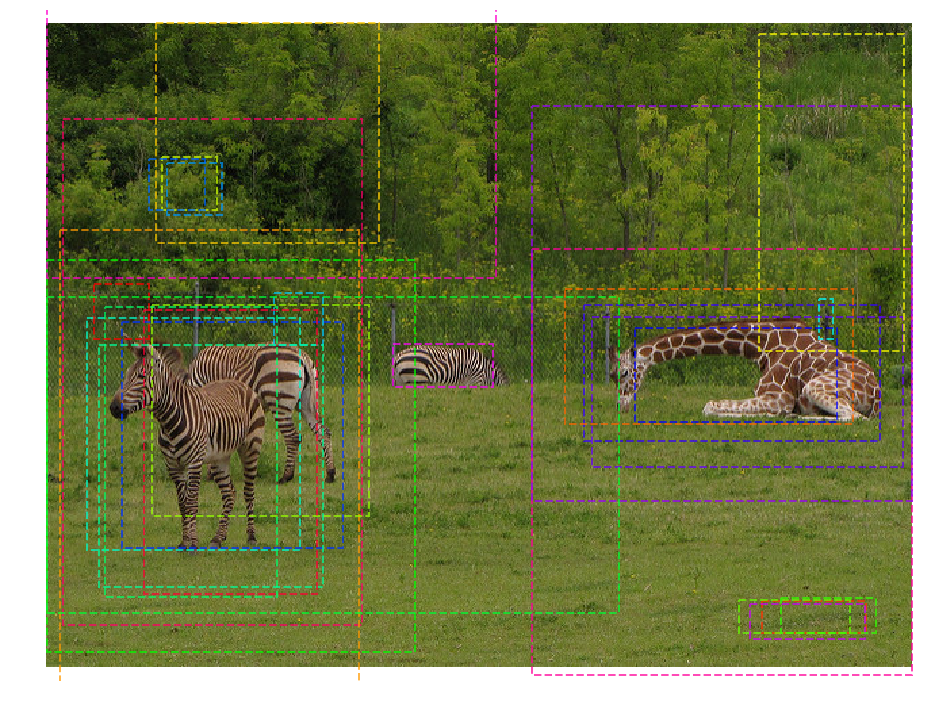

In [5]:
img_path = '/Users/sam/All-Program/App-DataSet/ObjectDetection/images/3627527276_6fe8cd9bfe_z.jpg'
Visualize(img_path).visualize_boxes(boxes=detections_dnormed[0][0:30])

# When Pre-NMS Detections (Proposals) are detection